In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
import cv2

from ex4_utils import *

In [25]:
import sympy as sp
from sympy.interactive.printing import init_printing
from sympy import latex

init_printing(use_unicode=False, wrap_line=False)

## Constant velocity model

In [26]:
T = sp.symbols('T')
F = sp.Matrix([[0, 1],[0, 0]])
Fi = sp.exp(F*T)
Fi

[1  T]
[    ]
[0  1]

## Nearly constant velocity model

### 1D

In [27]:
T, q = sp.symbols('T q')
Fi = sp.Matrix([[1, T],[0, 1]])
L = sp.Matrix([[0], [1]])
Q = sp.integrate((Fi*L)*q*(Fi*L).T, (T, 0, T))
Q

[ 3     2  ]
[T *q  T *q]
[----  ----]
[ 3     2  ]
[          ]
[ 2        ]
[T *q      ]
[----  T*q ]
[ 2        ]

### 2D

In [28]:
T, q = sp.symbols('T q')
F = sp.Matrix([[0, 1, 0, 0],[0, 0, 0, 0],[0, 0, 0, 1],[0, 0, 0, 0]])
Fi = sp.exp(F*T)
Fi

[1  T  0  0]
[          ]
[0  1  0  0]
[          ]
[0  0  1  T]
[          ]
[0  0  0  1]

In [31]:
print(latex(F))

\left[\begin{matrix}0 & 1 & 0 & 0\\0 & 0 & 0 & 0\\0 & 0 & 0 & 1\\0 & 0 & 0 & 0\end{matrix}\right]


In [30]:
print(latex(Fi))

\left[\begin{matrix}1 & T & 0 & 0\\0 & 1 & 0 & 0\\0 & 0 & 1 & T\\0 & 0 & 0 & 1\end{matrix}\right]


In [32]:
L = sp.Matrix([[0, 0], [1, 0], [0, 0], [0, 1]])
Q = sp.integrate((Fi*L)*q*(Fi*L).T, (T, 0, T))
Q

[ 3     2              ]
[T *q  T *q            ]
[----  ----   0     0  ]
[ 3     2              ]
[                      ]
[ 2                    ]
[T *q                  ]
[----  T*q    0     0  ]
[ 2                    ]
[                      ]
[             3     2  ]
[            T *q  T *q]
[ 0     0    ----  ----]
[             3     2  ]
[                      ]
[             2        ]
[            T *q      ]
[ 0     0    ----  T*q ]
[             2        ]

In [33]:
print(latex(Q))
print(latex(L))

\left[\begin{matrix}\frac{T^{3} q}{3} & \frac{T^{2} q}{2} & 0 & 0\\\frac{T^{2} q}{2} & T q & 0 & 0\\0 & 0 & \frac{T^{3} q}{3} & \frac{T^{2} q}{2}\\0 & 0 & \frac{T^{2} q}{2} & T q\end{matrix}\right]
\left[\begin{matrix}0 & 0\\1 & 0\\0 & 0\\0 & 1\end{matrix}\right]


In [5]:
T, q = sp.symbols('T q')
F = sp.Matrix([[0, 0, 1, 0],[0, 0, 0, 1],[0, 0, 0, 0],[0, 0, 0, 0]])
Fi = sp.exp(F*T)
Fi

[1  0  T  0]
[          ]
[0  1  0  T]
[          ]
[0  0  1  0]
[          ]
[0  0  0  1]

## Random walk

In [34]:
T, q = sp.symbols('T q')
F = sp.Matrix([[0, 0],[0, 0]])
Fi = sp.exp(F*T)
Fi


[1  0]
[    ]
[0  1]

In [36]:
L = sp.Matrix([[1, 0], [0, 1]])
Q = sp.integrate((Fi*L)*q*(Fi*L).T, (T, 0, T))
Q

[T*q   0 ]
[        ]
[ 0   T*q]

In [37]:
print(latex(Q))

\left[\begin{matrix}T q & 0\\0 & T q\end{matrix}\right]


In [7]:
L = sp.Matrix([[1, 0], [0, 0], [0, 1], [0, 0]])
L

[1  0]
[    ]
[0  0]
[    ]
[0  1]
[    ]
[0  0]

## Nearly constant acceleration

In [38]:
T, q = sp.symbols('T q')
F = sp.Matrix([[0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0]])
Fi = sp.exp(F*T)
Fi

[       2          ]
[      T           ]
[1  T  --  0  0  0 ]
[      2           ]
[                  ]
[0  1  T   0  0  0 ]
[                  ]
[0  0  1   0  0  0 ]
[                  ]
[                 2]
[                T ]
[0  0  0   1  T  --]
[                2 ]
[                  ]
[0  0  0   0  1  T ]
[                  ]
[0  0  0   0  0  1 ]

In [39]:
print(latex(F))

\left[\begin{matrix}0 & 1 & 0 & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 0 & 0\\0 & 0 & 0 & 0 & 1 & 0\\0 & 0 & 0 & 0 & 0 & 1\\0 & 0 & 0 & 0 & 0 & 0\end{matrix}\right]


In [40]:
print(latex(Fi))

\left[\begin{matrix}1 & T & \frac{T^{2}}{2} & 0 & 0 & 0\\0 & 1 & T & 0 & 0 & 0\\0 & 0 & 1 & 0 & 0 & 0\\0 & 0 & 0 & 1 & T & \frac{T^{2}}{2}\\0 & 0 & 0 & 0 & 1 & T\\0 & 0 & 0 & 0 & 0 & 1\end{matrix}\right]


In [41]:
L = sp.Matrix([[0, 0], [0, 0], [1, 0], [0, 0], [0, 0], [0, 1]])
L

[0  0]
[    ]
[0  0]
[    ]
[1  0]
[    ]
[0  0]
[    ]
[0  0]
[    ]
[0  1]

In [42]:
Q = sp.integrate((Fi*L)*q*(Fi*L).T, (T, 0, T))
Q

[ 5     4     3                    ]
[T *q  T *q  T *q                  ]
[----  ----  ----   0     0     0  ]
[ 20    8     6                    ]
[                                  ]
[ 4     3     2                    ]
[T *q  T *q  T *q                  ]
[----  ----  ----   0     0     0  ]
[ 8     3     2                    ]
[                                  ]
[ 3     2                          ]
[T *q  T *q                        ]
[----  ----  T*q    0     0     0  ]
[ 6     2                          ]
[                                  ]
[                   5     4     3  ]
[                  T *q  T *q  T *q]
[ 0     0     0    ----  ----  ----]
[                   20    8     6  ]
[                                  ]
[                   4     3     2  ]
[                  T *q  T *q  T *q]
[ 0     0     0    ----  ----  ----]
[                   8     3     2  ]
[                                  ]
[                   3     2        ]
[                  T *q  T *q      ]
[

In [43]:
print(latex(Q))

\left[\begin{matrix}\frac{T^{5} q}{20} & \frac{T^{4} q}{8} & \frac{T^{3} q}{6} & 0 & 0 & 0\\\frac{T^{4} q}{8} & \frac{T^{3} q}{3} & \frac{T^{2} q}{2} & 0 & 0 & 0\\\frac{T^{3} q}{6} & \frac{T^{2} q}{2} & T q & 0 & 0 & 0\\0 & 0 & 0 & \frac{T^{5} q}{20} & \frac{T^{4} q}{8} & \frac{T^{3} q}{6}\\0 & 0 & 0 & \frac{T^{4} q}{8} & \frac{T^{3} q}{3} & \frac{T^{2} q}{2}\\0 & 0 & 0 & \frac{T^{3} q}{6} & \frac{T^{2} q}{2} & T q\end{matrix}\right]


In [44]:
print(latex(L))

\left[\begin{matrix}0 & 0\\0 & 0\\1 & 0\\0 & 0\\0 & 0\\0 & 1\end{matrix}\right]


In [15]:
T, q = sp.symbols('T q')
F = sp.Matrix([[0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]])
Fi = sp.exp(F*T)
Fi

[             2    ]
[            T     ]
[1  0  T  0  --  0 ]
[            2     ]
[                  ]
[                 2]
[                T ]
[0  1  0  T  0   --]
[                2 ]
[                  ]
[0  0  1  0  T   0 ]
[                  ]
[0  0  0  1  0   T ]
[                  ]
[0  0  0  0  1   0 ]
[                  ]
[0  0  0  0  0   1 ]

In [16]:
L = sp.Matrix([[0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [0, 1]])
L

[0  0]
[    ]
[0  0]
[    ]
[0  0]
[    ]
[0  0]
[    ]
[1  0]
[    ]
[0  1]

In [18]:
from sympy import simplify
Q = sp.integrate((Fi*L)*q*(Fi*L).T, (T, 0, T))
Q_simplified = simplify(Q)
Q_simplified


[ 5           4           3        ]
[T *q        T *q        T *q      ]
[----   0    ----   0    ----   0  ]
[ 20          8           6        ]
[                                  ]
[       5           4           3  ]
[      T *q        T *q        T *q]
[ 0    ----   0    ----   0    ----]
[       20          8           6  ]
[                                  ]
[ 4           3           2        ]
[T *q        T *q        T *q      ]
[----   0    ----   0    ----   0  ]
[ 8           3           2        ]
[                                  ]
[       4           3           2  ]
[      T *q        T *q        T *q]
[ 0    ----   0    ----   0    ----]
[       8           3           2  ]
[                                  ]
[ 3           2                    ]
[T *q        T *q                  ]
[----   0    ----   0    T*q    0  ]
[ 6           2                    ]
[                                  ]
[       3           2              ]
[      T *q        T *q            ]
[

In [9]:
def to_numpy_matrix(matrices):
    return tuple(np.array(matrix).astype(np.float64) for matrix in matrices)


def derive_state_matrices(F, L):
    T, q = sp.symbols('T q')
    Fi = sp.exp(F*T)

    Q = sp.integrate((Fi*L)*q*(Fi*L).T, (T, 0, T))
    return Q, Fi


def get_state_matrices(model_name, dt, q, r):
    R = np.eye(2) * r
    if model_name == 'NCV':
        Fi, H, Q = get_ncv_matrices()
    elif model_name == 'NCA':
        Fi, H, Q = get_nca_matrices()
    elif model_name == 'RW':
        Fi, H, Q = get_rw_matrices()
    else:
        raise ValueError('Unknown model name')
    
    T, q_sym = sp.symbols('T q')
    Q = Q.subs({T: dt, q_sym: q})
    Fi = Fi.subs({T: dt})
    return to_numpy_matrix((Fi, H, Q, R))


def get_ncv_matrices():
    H  = np.array([[1, 0, 0, 0], 
                   [0, 0, 1, 0]])
    F = sp.Matrix([[0, 1, 0, 0],
                   [0, 0, 0, 0],
                   [0, 0, 0, 1],
                   [0, 0, 0, 0]])
    L = sp.Matrix([[0, 0],
                   [1, 0],
                   [0, 0],
                   [0, 1]])
    Q, Fi = derive_state_matrices(F, L)
    
    return (Fi, H, Q)
    
def get_nca_matrices():
    H = np.array([[1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0]])
    
    F = sp.Matrix([[0, 1, 0, 0, 0, 0], 
                   [0, 0, 1, 0, 0, 0], 
                   [0, 0, 0, 0, 0, 0], 
                   [0, 0, 0, 0, 1, 0], 
                   [0, 0, 0, 0, 0, 1], 
                   [0, 0, 0, 0, 0, 0]])
    L = sp.Matrix([[0, 0], 
                   [0, 0], 
                   [1, 0], 
                   [0, 0], 
                   [0, 0], 
                   [0, 1]])
    Q, Fi = derive_state_matrices(F, L)
    
    return (Fi, H, Q)

def get_rw_matrices():
    H = np.array([[1, 0],
                  [0, 1]])
    T, q = sp.symbols('T q')
    F = sp.Matrix([[0, 0],
                   [0, 0]])
    
    L = sp.Matrix([[1, 0], 
                   [0, 1]])
    
    Q, Fi = derive_state_matrices(F, L)
    return  Fi, H, Q



In [10]:
get_rw_matrices()[0]

[1  0]
[    ]
[0  1]

In [11]:
A, C, Q_i, R_i = get_state_matrices('NCV', 1, 1, 1)
A, C, Q_i, R_i

(array([[1., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 1.],
        [0., 0., 0., 1.]]),
 array([[1., 0., 0., 0.],
        [0., 0., 1., 0.]]),
 array([[0.33333333, 0.5       , 0.        , 0.        ],
        [0.5       , 1.        , 0.        , 0.        ],
        [0.        , 0.        , 0.33333333, 0.5       ],
        [0.        , 0.        , 0.5       , 1.        ]]),
 array([[1., 0.],
        [0., 1.]]))

In [12]:
N = 40
v = np.linspace(5 * math.pi, 0, N)
x = np.cos(v) * v
y = np.sin(v) * v

sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
sx[0] = x[0]
sy[0] = y[0]
state = np.zeros((A.shape[0], 1), dtype=np.float32).flatten()
state[0] = x[0]
state[1] = y[0]
covariance = np.eye(A.shape[0], dtype=np.float32)
for j in range(1, x.size):
    
    state, covariance, _, _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)), np.reshape(state, (-1, 1)), covariance)
    sx[j] = state[0]
    sy[j] = state[1]
    

/tmp/ipykernel_214548/3644885133.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
/tmp/ipykernel_214548/3644885133.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[1]


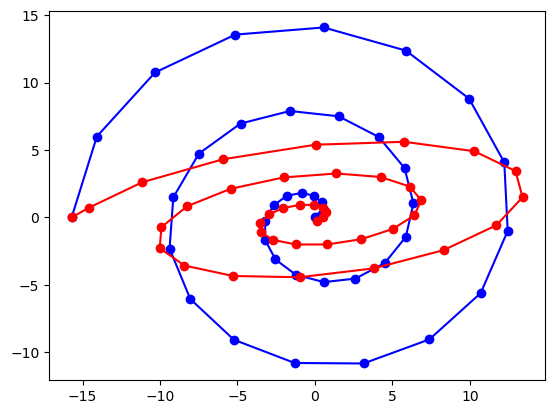

In [13]:
plt.plot(x,y, color='blue', label='True trajectory', marker='o')
plt.plot(sx, sy, color='red', label='Estimated trajectory', marker='o')

In [14]:
# A, C, Q_i, R_i = init_model('RW', 1, 0.1, 10)
A, C, Q_i, R_i = get_state_matrices('NCA', 1, 2, 1)

In [15]:
N = 40
v = np.linspace(5 * math.pi, 0, N)
x = np.cos(v) * v
y = np.sin(v) * v

sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
sx[0] = x[0]
sy[0] = y[0]
state = np.zeros((A.shape[0], 1), dtype=np.float32).flatten()
state[0] = x[0]
state[1] = y[0]
covariance = np.eye(A.shape[0], dtype=np.float32)
for j in range(1, x.size):
    
    state, covariance, _, _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)), np.reshape(state, (-1, 1)), covariance)
    # print(state)
    sx[j] = state[0]
    sy[j] = state[3]
    

/tmp/ipykernel_214548/2518349863.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
/tmp/ipykernel_214548/2518349863.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[3]


In [16]:
def run_kalman(model_type, trajectory, q, r):
    x, y = trajectory
    A, C, Q_i, R_i = get_state_matrices(model_type, 1, q, r)
    N = len(x)
    sx = np.zeros((x.size, 1), dtype=np.float32).flatten()
    sy = np.zeros((y.size, 1), dtype=np.float32).flatten()
    if model_type == 'RW':
        y_index = 1
    elif model_type == 'NCV':
        y_index = 2
    elif model_type == 'NCA':
        y_index = 3
    else:
        raise ValueError('Unknown model type')
    sx[0] = x[0]
    sy[0] = y[0]
    state = np.zeros((A.shape[0], 1), dtype=np.float32).flatten()
    state[0] = x[0]
    state[y_index] = y[0]
    covariance = np.eye(A.shape[0], dtype=np.float32)
    for j in range(1, x.size):
        state, covariance, _, _ = kalman_step(A, C, Q_i, R_i, np.reshape(np.array([x[j], y[j]]), (-1, 1)), np.reshape(state, (-1, 1)), covariance)
        sx[j] = state[0]
        sy[j] = state[y_index]
    
    return sx, sy

In [17]:
# for model_type in ['RW', 'NCV', 'NCA']:
#     for r, q in [(1, 1), (1, 10), (1, 100), (10, 1), (100, 5)]:
#         sx, sy = run_kalman(model_type, (x, y), q, r)
#         plt.plot(sx, sy, label=f'{model_type} q={q} r={r}', marker='o', color='red')
#         plt.plot(x,y, color='blue', label='True trajectory', marker='o')
#         plt.show()
    # sx, sy = run_kalman(model_type, (x, y), 1, 1)
    # plt.plot(sx, sy, label=model_type)

In [18]:
# Spiral
def test_kalman(A, C, Q_i, R_i):
    N = 40
    v = np.linspace(5 * math.pi, 0, N)
    x = np.cos(v) * v
    y = np.sin(v) * v

    sx = np.zeros((x.size, 1 ), dtype=np.float32).flatten()
    sy = np.zeros((y.size, 1 ), dtype=np.float32).flatten()
    sx[0] = x[0]
    sy[0] = y[0]
    state = np.zeros((A.shape[0], 1), dtype=np.float32).flatten()
    state[0] = x[0]
    state[1] = y[0]
    covariance = np.eye(A.shape[0], dtype=np.float32)
    for j in range(1, x.size):
        state, covariance , _ , _ = kalman_step(A, C, Q_i, R_i , np.reshape(np.array([x[j], y[j]]), (-1, 1)), np.reshape(state, (-1, 1)), covariance)
        sx[j] = state[0]
        sy[j] = state[1] 

    return x, y, sx, sy

/tmp/ipykernel_214548/188217898.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
/tmp/ipykernel_214548/188217898.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[y_index]


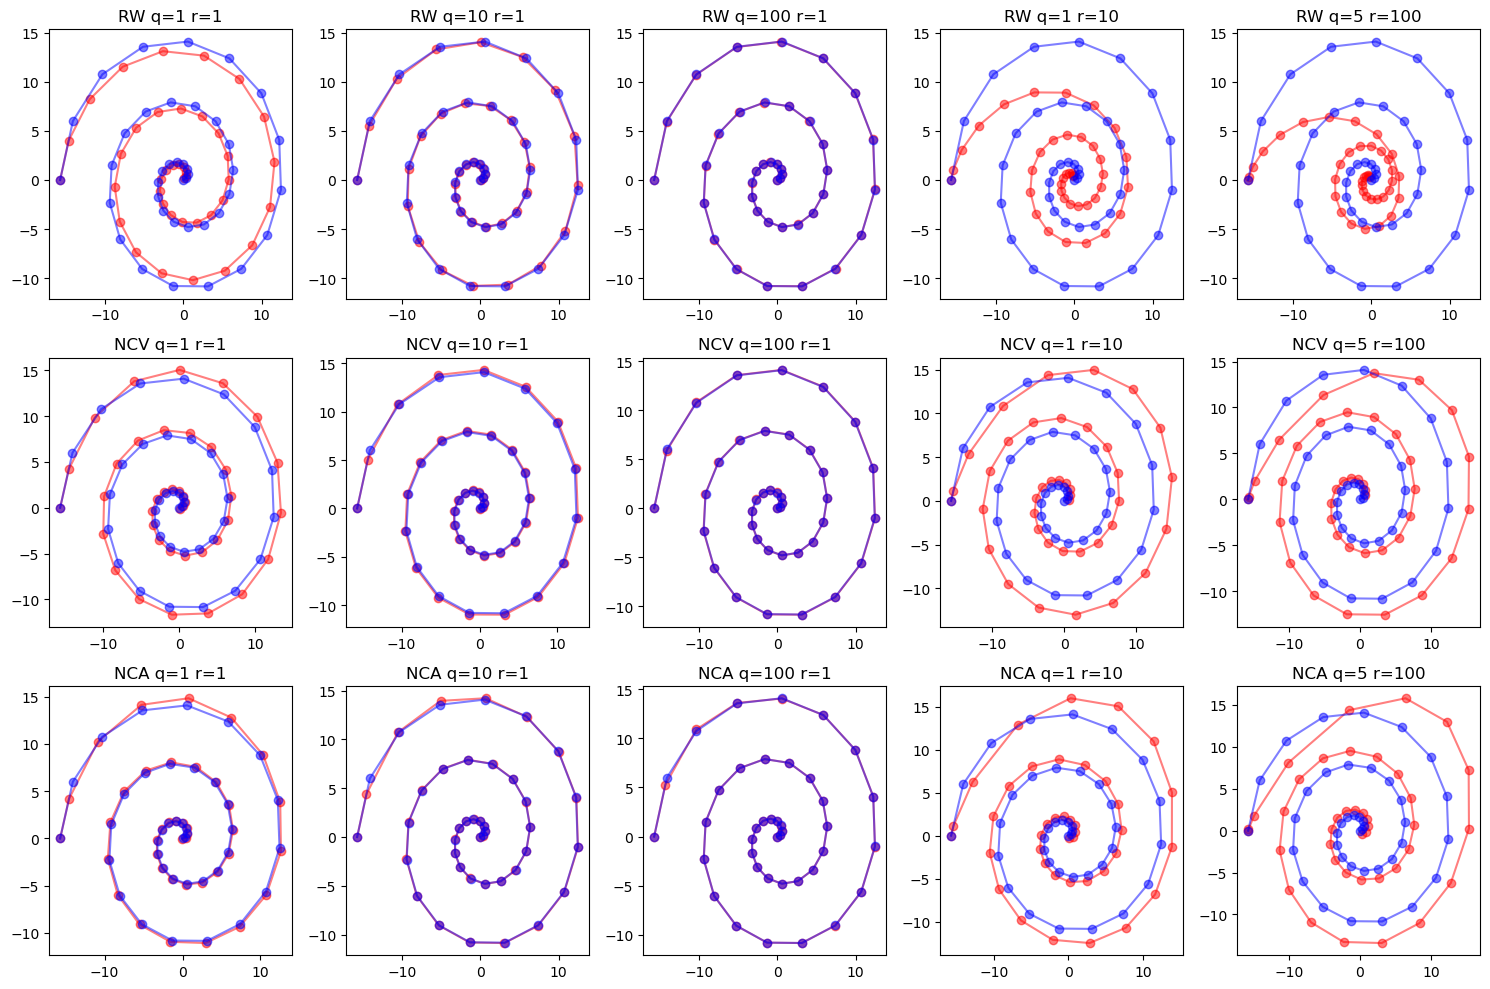

In [20]:
model_types = ['RW', 'NCV', 'NCA']
combinations = [(1, 1), (1, 10), (1, 100), (10, 1), (100, 5)]
num_rows = len(model_types)
num_cols = len(combinations)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through each combination and plot
for i, model_type in enumerate(model_types):
    for j, (r, q) in enumerate(combinations):
        sx, sy = run_kalman(model_type, (x, y), q, r)
        axs[i, j].plot(sx, sy, label=f'{model_type} q={q} r={r}', marker='o', color='red', alpha=0.5)
        axs[i, j].plot(x, y, color='blue', label='True trajectory', marker='o', alpha=0.5)
        # axs[i, j].legend()
        axs[i, j].set_title(f'{model_type} q={q} r={r}')

plt.tight_layout()
plt.savefig('./plots/kalman_spiral.pdf')
plt.show()

/tmp/ipykernel_579908/188217898.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
/tmp/ipykernel_579908/188217898.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[y_index]


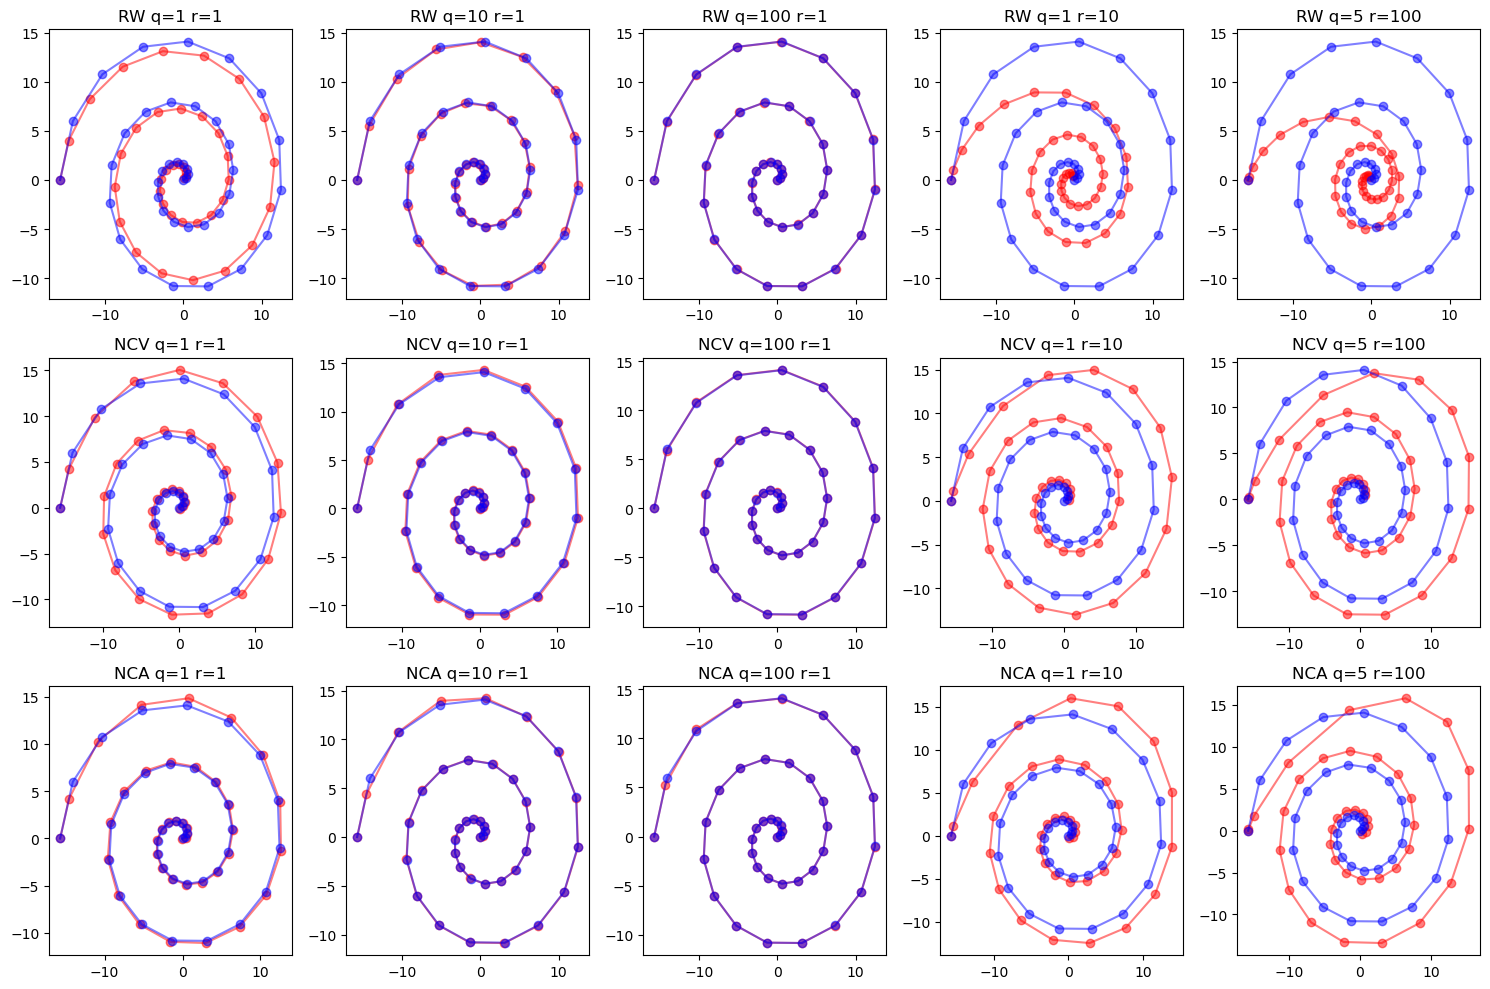

In [237]:
model_types = ['RW', 'NCV', 'NCA']
combinations = [(1, 1), (1, 10), (1, 100), (10, 1), (100, 5)]
num_rows = len(model_types)
num_cols = len(combinations)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through each combination and plot
for i, model_type in enumerate(model_types):
    for j, (r, q) in enumerate(combinations):
        sx, sy = run_kalman(model_type, (x, y), q, r)
        axs[i, j].plot(sx, sy, label=f'{model_type} q={q} r={r}', marker='o', color='red', alpha=0.5)
        axs[i, j].plot(x, y, color='blue', label='True trajectory', marker='o', alpha=0.5)
        # axs[i, j].legend()
        axs[i, j].set_title(f'{model_type} q={q} r={r}')

plt.tight_layout()
plt.show()

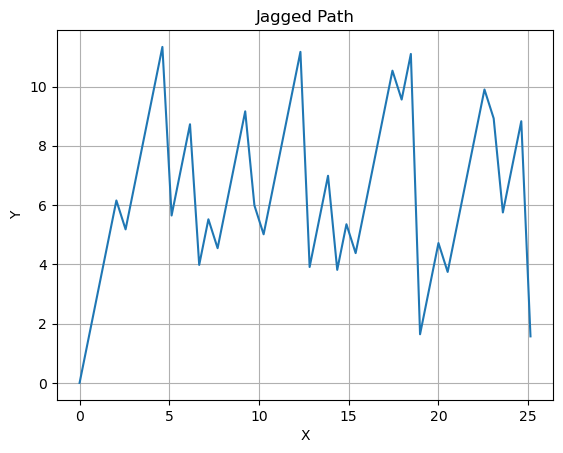

In [21]:
N = 50
v = np.linspace(0, 8 * np.pi, N)
x = v
y = np.mod(v, 2*np.pi) + np.mod(v, 1.5*np.pi) + np.mod(v, 0.8*np.pi)

plt.plot(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Jagged Path')
plt.grid(True)
plt.show()


/tmp/ipykernel_214548/188217898.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
/tmp/ipykernel_214548/188217898.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[y_index]


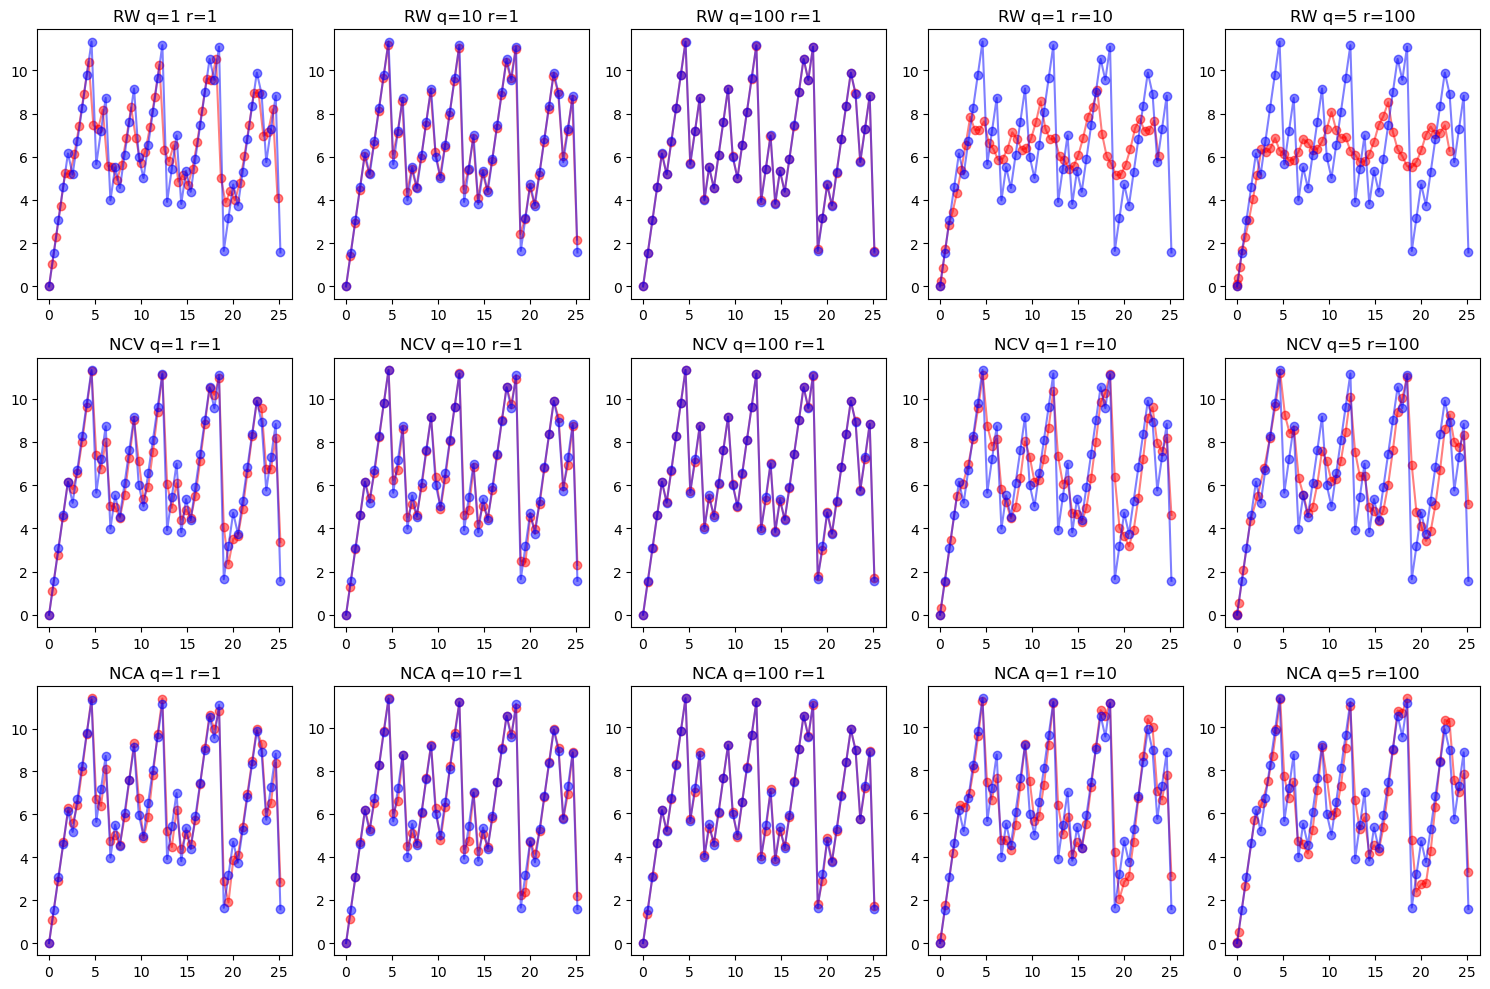

In [22]:
model_types = ['RW', 'NCV', 'NCA']
combinations = [(1, 1), (1, 10), (1, 100), (10, 1), (100, 5)]
num_rows = len(model_types)
num_cols = len(combinations)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through each combination and plot
for i, model_type in enumerate(model_types):
    for j, (r, q) in enumerate(combinations):
        sx, sy = run_kalman(model_type, (x, y), q, r)
        axs[i, j].plot(sx, sy, label=f'{model_type} q={q} r={r}', marker='o', color='red', alpha=0.5)
        axs[i, j].plot(x, y, color='blue', label='True trajectory', marker='o', alpha=0.5)
        # axs[i, j].legend()
        axs[i, j].set_title(f'{model_type} q={q} r={r}')

plt.tight_layout()
plt.savefig('./plots/kalman_sawtooth.pdf')

plt.show()

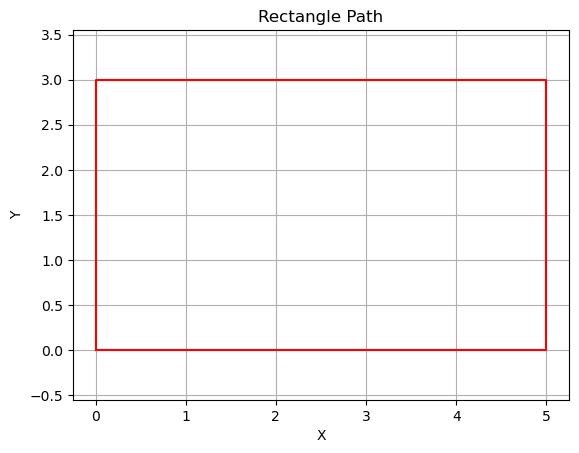

In [23]:
x_corners = [0, 5, 5, 0, 0]
y_corners = [0, 0, 3, 3, 0]
x = np.array(x_corners)
y = np.array(y_corners)
plt.plot(x_corners, y_corners, 'r-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Rectangle Path')
plt.grid(True)
plt.axis('equal')
plt.show()

/tmp/ipykernel_214548/188217898.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sx[j] = state[0]
/tmp/ipykernel_214548/188217898.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sy[j] = state[y_index]


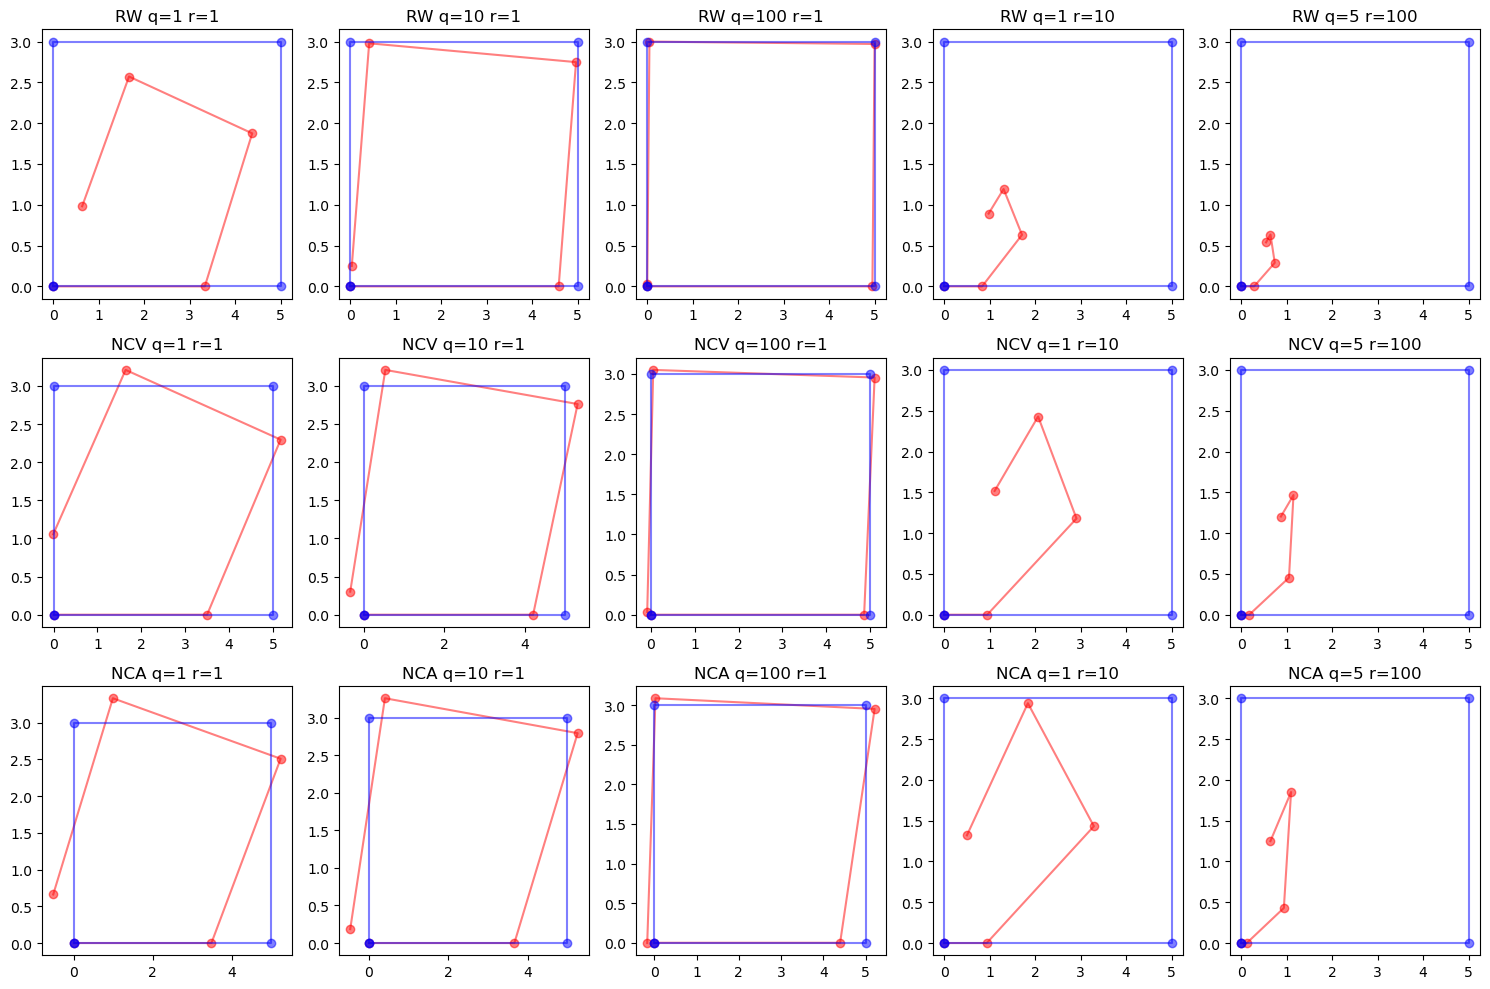

In [24]:
model_types = ['RW', 'NCV', 'NCA']
combinations = [(1, 1), (1, 10), (1, 100), (10, 1), (100, 5)]
num_rows = len(model_types)
num_cols = len(combinations)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through each combination and plot
for i, model_type in enumerate(model_types):
    for j, (r, q) in enumerate(combinations):
        sx, sy = run_kalman(model_type, (x, y), q, r)
        axs[i, j].plot(sx, sy, label=f'{model_type} q={q} r={r}', marker='o', color='red', alpha=0.5)
        axs[i, j].plot(x, y, color='blue', label='True trajectory', marker='o', alpha=0.5)
        # axs[i, j].legend()
        axs[i, j].set_title(f'{model_type} q={q} r={r}')

plt.tight_layout()
plt.savefig('./plots/kalman_rectangle.pdf')
plt.show()